In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from astropy.io import fits

In [41]:
n = 64 #grid size
mask_grid = np.zeros([n,n])
mask_rec = np.zeros([n,n])

In [42]:
for i,row in enumerate(mask_grid):
    for j,col in enumerate(row):
        if floor((i-4.)/8.)%2==0 or floor((j-4.)/8.)%2==0:
            mask_grid[i,j]=1

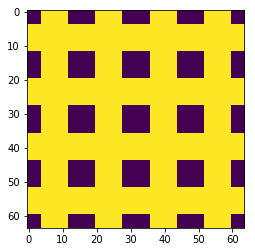

In [43]:
imshow(mask_grid)

In [46]:
sum(mask_grid)

3072.0

In [51]:
sum(mask_rec)

2916.0

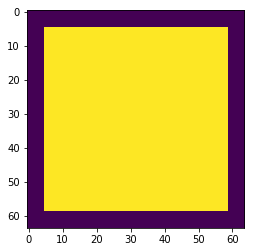

In [50]:
mask_rec[5:-5,5:-5] = 1.0
imshow(mask_rec)

In [53]:
np.savetxt('mask_grid.txt', mask_grid)

In [52]:
np.savetxt('mask_rec.txt', mask_rec)

In [54]:
hdulist = fits.open('./cmassR_SDSS_nside256_mask.fits')

In [55]:
hdulist.info()

Filename: ./cmassR_SDSS_nside256_mask.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       4   ()      
  1  xtension    BinTableHDU     18   768R x 1C   [1024E]   


In [63]:
hdulist[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096 / length of dimension 1                          
NAXIS2  =                  768 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    1 / number of table fields                         
TTYPE1  = 'I       '                                                            
TFORM1  = '1024E   '                                                            
PIXTYPE = 'HEALPIX '           / HEALPIX pixelisation                           
ORDERING= 'RING    '           / Pixel ordering scheme, either RING or NESTED   
EXTNAME = 'xtension'        

In [110]:
data = np.array(hdulist[1].data)

In [93]:
data_end=np.array([data[i][0] for i,_ in enumerate(data)])

In [122]:
map_real = data_end[260:324,145:209]

map_real[30:64,10:12]=0

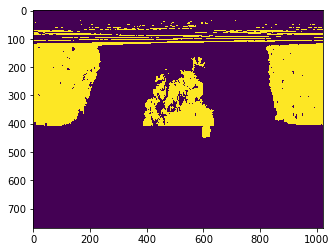

In [128]:
imshow(data_end)

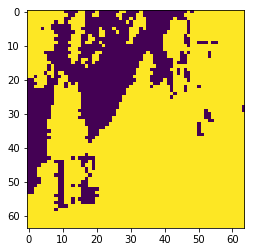

In [133]:
imshow(data_end[300:364,500:564])

In [134]:
np.sum(data_end[300:364,500:564])

3023.0

In [135]:
np.savetxt("mask_irr.txt",data_end[300:364,500:564])

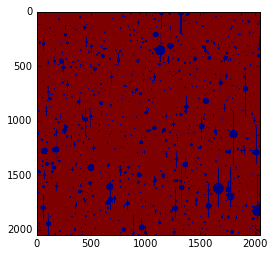

In [9]:
data_trunc = data[:2048,:2048]
imshow(data_trunc)

In [10]:
np.savetxt('mask.txt', data_trunc)

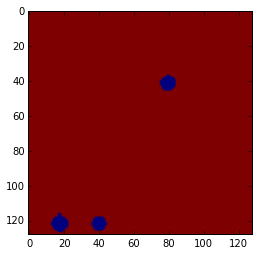

In [15]:
imshow(data_trunc[:128,:128])